# Introduction to Gradient Descent Regression
Linear Regression is the starting point for most analyses that wish to predict a value

In [1]:
# Load up Numpy and Matplotlib for visualisation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
np.random.seed(1919)

In [2]:
m=100

In [3]:
# Generate numPoints random uniform points 
x = 2.0 * np.random.rand(m)

In [4]:
#The y values are the equation y = 4 + 3x plus some noise
y = 4.0 + 3.0 * x + np.random.randn(m) 

In [5]:
x = x.reshape(m,1)

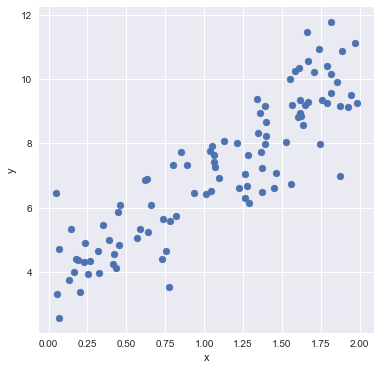

In [6]:
# Plot these on a scatter plot
plt.figure(figsize=(6, 6))
plt.xlabel('x')
plt.ylabel('y') 
plt.scatter(x,y); # semi-colon suppresses output

## Batch Gradient Descent

We define a function that does Gradient Descent

In [7]:
def gradient_descent(alpha, x, y, ftol=0.000001, max_iter=200):

    converged = False
    num_iter = 0
    m = x.shape[0] # number of samples
    
    theta0 = 1.0
    theta1 = 1.0
    
    J = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])/m/2.0

    while not converged:

        # for each training sample, compute the gradient wrt t0 and t1
        grad0 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i])*x[i] for i in range(m)])
        temp0 = theta0 - alpha * grad0
        temp1 = theta1 - alpha * grad1
        theta0 = temp0
        theta1 = temp1
        
        # mean squared error
        e = sum( [ (theta0 + theta1 * x[i] - y[i])**2 for i in range(m)] ) /2.0/m

        if abs(J-e) <= ftol: converged = True

        J = e   # update error 
        num_iter += 1  # update iter
        
        if num_iter == max_iter: # max iterations exceeded
            converged = True

    return theta0,theta1,num_iter,e

In [8]:
alpha = 0.1
theta0, theta1, numIters, e = gradient_descent(alpha,x,y)    
print("al:",alpha," t0:",theta0, " t1:", theta1, " J:", e, " nIters:", numIters)

In [9]:
# Using gradient descent
for alpha in np.arange(0.1,1.5,0.05):
    theta0, theta1, numIters, e = gradient_descent(alpha,x,y)    
    print("al:",alpha," t0:",theta0, " t1:", theta1, " J:", e, " nIters:", numIters)

al: 0.1  t0: [3.54083296]  t1: [3.35067172]  J: [0.51146868]  nIters: 200
al: 0.15000000000000002  t0: [3.55183033]  t1: [3.34199367]  J: [0.51141963]  nIters: 160
al: 0.20000000000000004  t0: [3.55382777]  t1: [3.34041749]  J: [0.51141376]  nIters: 125
al: 0.25000000000000006  t0: [3.55517476]  t1: [3.33935458]  J: [0.51141032]  nIters: 103
al: 0.30000000000000004  t0: [3.55582529]  t1: [3.33884124]  J: [0.51140881]  nIters: 87
al: 0.3500000000000001  t0: [3.55663608]  t1: [3.33820145]  J: [0.51140707]  nIters: 76
al: 0.40000000000000013  t0: [3.5575023]  t1: [3.33751792]  J: [0.51140538]  nIters: 68
al: 0.45000000000000007  t0: [3.55790762]  t1: [3.33719808]  J: [0.51140465]  nIters: 61
al: 0.5000000000000001  t0: [3.55860766]  t1: [3.33664568]  J: [0.51140348]  nIters: 56
al: 0.5500000000000002  t0: [3.55876662]  t1: [3.33652024]  J: [0.51140323]  nIters: 51
al: 0.6000000000000002  t0: [3.55902044]  t1: [3.33631995]  J: [0.51140284]  nIters: 47
al: 0.6500000000000001  t0: [3.5594949

We see that the convergence breaks down at higher values of $\alpha$

### Using SciKit's Stochastic Gradient Descent Regressor

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [10]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=10000, warm_start=False, penalty=None,learning_rate='constant',eta0=0.0005, tol=None)

In [11]:
sgd.fit(x,y)

C:\Users\Dominic\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [12]:
sgd.coef_

array([3.3304871])

In [13]:
sgd.intercept_

array([3.56506956])

In [14]:
sgd.n_iter_

10000